# Q-Trading 

In [16]:
import xarray as xr
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import rloutrading as rlou
from importlib import reload

In [7]:
kappa, sigma, xbar, phi, gamma, c, T, dt, A, B, C, D = 1, 0.2000, 100, 0.0100, 0.2000, 0.3000, 2, 0.1, 20, 20, 20, 20

qtr = rlou.QTrading(kappa, sigma, xbar, phi, gamma, c, T, dt, A, B, C, D)

# N-simulation episodios, time, inventory, action
reward = qtr.simulate_reward_matrix();

In [18]:
qtr.q_learn(500)
qtr.Q.to_netcdf("Q-trading.nc")

100%|██████████| 500/500 [01:19<00:00,  6.27it/s]


In [13]:
Qm = xr.load_dataarray("Q-trading.nc")

<AxesSubplot:xlabel='inventory', ylabel='price'>

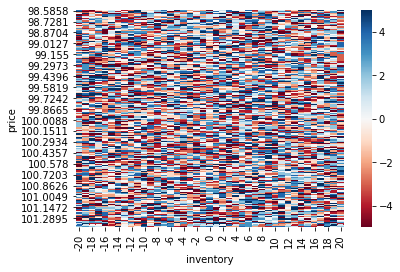

In [17]:
# heatmap values
hm_values = Qm.isel(time=8).argmax(dim="action").to_dataframe("A").reset_index()
hm_values = hm_values.pivot_table(index="price", columns="inventory", values="A") - 5
sns.heatmap(hm_values, cmap="RdBu", vmin=-5, vmax=5)